In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data_test = pd.read_csv("test.csv")
data_train = pd.read_csv("train.csv")

In [3]:
data_train = data_train.drop('PassengerId', axis=1, inplace=False)

In [6]:
x = np.linspace(0, len(data_train-1, num=len(data_train)*2))

augmented_data = np.interp(x, np.arange(len(data_train)), data_train)

augmented_data
     


TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [4]:
X = data_train.drop('Transported', axis=1)  # Замените 'target_column' на имя вашей целевой переменной
y = data_train['Transported']

In [ ]:
X

In [5]:
# Разделение столбца 'Cabin' на три отдельных столбца
new_columns = X['Cabin'].str.split('/', expand=True)
new_columns.columns = ['Cabin_1', 'Cabin_2', 'Cabin_3']
# Объединение новых столбцов с исходным DataFrame
X = pd.concat([X, new_columns], axis=1)
X = X.drop('Cabin', axis=1)

In [6]:
# Разделение столбца 'Cabin' на три отдельных столбца
new_columns = X['Name'].str.split(' ', expand=True)
new_columns.columns = ['Name_1', 'Name_2']
# Объединение новых столбцов с исходным DataFrame
X = pd.concat([X, new_columns], axis=1)
X = X.drop('Name', axis=1)

In [7]:
# Сделаем тоже самое для data_test
new_columns1 = data_test['Cabin'].str.split('/', expand=True)
new_columns1.columns = ['Cabin_1', 'Cabin_2', 'Cabin_3']
data_test = pd.concat([data_test, new_columns1], axis=1)
data_test = data_test.drop('Cabin', axis=1)

# Сделаем тоже самое для data_test
new_columns1 = data_test['Name'].str.split(' ', expand=True)
new_columns1.columns = ['Name_1', 'Name_2']
data_test = pd.concat([data_test, new_columns1], axis=1)
data_test = data_test.drop('Name', axis=1)

In [ ]:
X

In [8]:
num_cols = ['Age','RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'Cabin_2','VRDeck', 'CryoSleep', 'VIP']
cat_cols = ['HomePlanet', 'Destination', 'Cabin_1', 'Cabin_3','Name_1','Name_2']

In [9]:
X[num_cols] = X[num_cols].astype(float)

In [10]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#X[num_cols] = KNNImputer(n_neighbors = 50, weights = 'uniform').fit_transform(X[num_cols])
X[num_cols] = IterativeImputer(initial_strategy= 'most_frequent', n_nearest_features = 40, random_state=0, max_iter = 10).fit_transform(X[num_cols])
X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_1,Cabin_2,Cabin_3,Name_1,Name_2
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,B,0.0,P,Maham,Ofracculy
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,F,0.0,S,Juanna,Vines
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,A,0.0,S,Altark,Susent
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,A,0.0,S,Solam,Susent
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,F,1.0,S,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0.0,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,A,98.0,P,Gravior,Noxnuther
8689,Earth,1.0,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,G,1499.0,S,Kurta,Mondalley
8690,Earth,0.0,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,G,1500.0,S,Fayey,Connon
8691,Europa,0.0,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,E,608.0,S,Celeon,Hontichre


In [11]:
X = X.drop(['Name_2', 'Name_1'], axis=1)
cat_cols = ['HomePlanet', 'Destination', 'Cabin_1', 'Cabin_3']

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Cabin_1       8693 non-null   object 
 11  Cabin_2       8693 non-null   float64
 12  Cabin_3       8693 non-null   object 
 13  Name_1        8693 non-null   object 
 14  Name_2        8693 non-null   object 
dtypes: float64(9), object(6)
memory usage: 1018.8+ KB


In [11]:
def outlier_function(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count += 1
    return lower_limit, upper_limit, outlier_count

for col in  X[num_cols][:17]:
    out=outlier_function(X,col)
    if out[2]>0:
        print(f"There are {out[2]} outliers in {col}")
    else: print(f"There are not outliers in {col}")

There are not outliers in Age
There are 1682 outliers in RoomService
There are 1595 outliers in FoodCourt
There are 1523 outliers in ShoppingMall
There are 1512 outliers in Spa
There are not outliers in Cabin_2
There are 1576 outliers in VRDeck
There are not outliers in CryoSleep
There are 402 outliers in VIP


In [12]:
# Разделение данных на обучающий и тестовый наборы
rng = np.random.RandomState(142)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, 
                     stratify=y, 
                     random_state=rng)

In [ ]:
from category_encoders.utils import sklearn
import optuna
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
import numpy as np
from optuna.integration import CatBoostPruningCallback
from catboost import CatBoostClassifier

# Предположим, что у вас есть данные X и y
# X содержит как числовые, так и категориальные столбцы
# num_cols и cat_cols - это списки с именами числовых и категориальных столбцов соответственно

# Функция для создания препроцессора
def create_preprocessor(numeric_transformer, categorical_transformer):
    return ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_cols),
            ('cat', categorical_transformer, cat_cols),
        ])

# Функция для создания пайплайна с использованием гиперпараметров из Optuna
def create_pipeline(trial):
    # Определяем гиперпараметры для препроцессора
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown = 'infrequent_if_exist')

    # Создаем препроцессор
    preprocessor = create_preprocessor(numeric_transformer, categorical_transformer)

    # Определяем гиперпараметры для модели
    param = {
        'iterations' : trial.suggest_int("iterations", 100, 1500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 3, 50),
        #"colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.55),
        "auto_class_weights": trial.suggest_categorical("auto_class_weights", ["SqrtBalanced", "Balanced", "None"]),
        "depth": trial.suggest_int("depth", 1, 6),
        #"boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
        "rsm": trial.suggest_float("rsm", 0.5, 0.55),
        "leaf_estimation_iterations": trial.suggest_int("leaf_estimation_iterations", 1, 5),
        "max_ctr_complexity": trial.suggest_int("max_ctr_complexity", 1, 2),
        "loss_function": 'Logloss',
        "eval_metric":"AUC"
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 20)

    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    # Создаем модель с гиперпараметрами
    pruning_callback = CatBoostPruningCallback(trial, "AUC")
    estimator = CatBoostClassifier(**param, thread_count=-1,
                                   verbose=500, random_seed=42)

    # Создаем пайплайн
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', estimator)
    ])

    return pipeline

# Функция для оптимизации с использованием Optuna
def objective(trial):
    # Создаем пайплайн с гиперпараметрами из текущей попытки
    pipeline = create_pipeline(trial)

    # Оцениваем качество модели с использованием кросс-валидации
    #scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    #accuracy = np.mean(scores)
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)

    return accuracy  # Optuna будет максимизировать эту метрику

# Создаем экземпляр Optuna и запускаем оптимизацию
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize")
study.optimize(objective, 
               n_trials=3,
               n_jobs = -1,
               show_progress_bar=True,)

# Выводим лучшие гиперпараметры
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

In [13]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_1,Cabin_2,Cabin_3,Name_1,Name_2
1189,Europa,0.0,55 Cancri e,43.000000,0.0,1365.0,3106.0,0.0,50.0,2313.0,C,49.0,P,Brafirk,Healted
4147,Earth,0.0,PSO J318.5-22,18.000000,0.0,0.0,2.0,1513.0,0.0,0.0,F,836.0,S,Ireen,Robins
6996,Earth,0.0,55 Cancri e,42.000000,0.0,0.0,279.0,30.0,409.0,0.0,E,483.0,P,Gaylah,Hanner
3382,Earth,1.0,PSO J318.5-22,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,G,595.0,P,Erick,Pacerty
1170,Earth,0.0,55 Cancri e,21.000000,0.0,614.0,43.0,0.0,1.0,0.0,F,246.0,P,Briany,Lancock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6616,Earth,0.0,TRAPPIST-1e,44.000000,0.0,3.0,0.0,33.0,769.0,0.0,F,1331.0,S,Stevey,Reilline
882,Earth,0.0,55 Cancri e,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,G,137.0,P,Terrie,Weaverays
4354,Earth,0.0,TRAPPIST-1e,14.000000,0.0,514.0,0.0,392.0,0.0,0.0,E,299.0,S,Elindy,Gilleyons
6349,Earth,1.0,TRAPPIST-1e,26.153168,0.0,0.0,0.0,0.0,0.0,0.0,G,1088.0,P,Garlie,Mcfaddoxter


In [14]:
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from catboost import CatBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import KFold, cross_val_score,  cross_validate
from tqdm import tqdm

In [15]:

# Создаем пайплайн для числовых признаков: стандартизация + PCA
numeric_transformer1 = Pipeline(steps=[
   ('scaler', RobustScaler()),
    # ('PCA', PCA(#kernel='linear', 
            #    n_components=9))
                # )  # разрежение признаков РСА
    #('LDA', LDA(n_components=1))  # разрежение признаков LDА
     ])

# Пайплайн для категориальных признаков: иммутация пропусков + кодирование
categorical_transformer1 = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first' , sparse_output=False, handle_unknown = 'infrequent_if_exist')),
    #('encoder', CatBoostEncoder()),
    #('encoder', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=10125)),
   # ('scaler', StandardScaler()),
   # ('PCA', PCA(n_components=0.99))  # разрежение признаков РСА
    #('LDA', LDA(n_components=1))  # разрежение признаков LDА
    ])

# Создаем ColumnTransformer, который применяет нужные трансформации к числовым и категориальным признакам
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer1, num_cols),
        ('cat', categorical_transformer1, cat_cols),
         ])

# Создание конвейера с препроцессором и классификатором
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=142, verbose = False, early_stopping_rounds=100,))
]) 

In [30]:
# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
#scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'classifier__iterations' : [1000],
       "classifier__learning_rate" : [0.01, 0.05],
        "classifier__l2_leaf_reg" : [3, 10, 50],
        #"colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.55),
    #   "classifier__auto_class_weights": ["SqrtBalanced", "Balanced", "None"],
       "classifier__depth" : [6, 8],
       "classifier__boosting_type" : ["Ordered", "Plain"],
      # "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
       # "rsm": trial.suggest_float("rsm", 0.5, 0.55),
       # "leaf_estimation_iterations": trial.suggest_int("leaf_estimation_iterations", 1, 5),
       # "max_ctr_complexity": trial.suggest_int("max_ctr_complexity", 1, 2),
            }
 
gs = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
   scoring='roc_auc',  # Пример scoring
    refit="roc_auc",
    n_jobs=-1,
    return_train_score=True,
    cv = 5, 
   )

gs.fit(X_train, y_train)
results = gs.cv_results_

In [ ]:
# Вывод результатов
print("Best parameters found: ", gs.best_params_)
print("Best cross-validation score: ", gs.best_score_)

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingRandomSearchCV

param_distrib = {#'classifier__iterations' : [1000, 1100, 1200],
       "classifier__learning_rate" : [0.01, 0.05],
        "classifier__l2_leaf_reg" : [3, 10, 50],
        #"colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.55),
    #   "classifier__auto_class_weights": ["SqrtBalanced", "Balanced", "None"],
       "classifier__depth" : [6, 8],
      #  "classifier__boosting_type" : ["Ordered", "Plain"],
      # "classifier__bootstrap_type" : ["Bayesian", "Bernoulli", "MVS"],
        #"grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
       # "rsm": trial.suggest_float("rsm", 0.5, 0.55),
       # "leaf_estimation_iterations": trial.suggest_int("leaf_estimation_iterations", 1, 5),
       # "max_ctr_complexity": trial.suggest_int("max_ctr_complexity", 1, 2),
            }
 
search = HalvingRandomSearchCV(estimator=pipe, param_distributions = param_distrib,
                              # resource='n_estimators',
                              n_jobs = -1 , verbose = False,
                             #  max_resources=10,
                               random_state=0).fit(X_train, y_train)
search.best_params_  


In [21]:
from sklearn.model_selection import KFold, cross_val_score,  cross_validate
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier(n_neighbors=185, n_jobs=-1)
svc = SVC(kernel='rbf', gamma = 1, C = 1, random_state=42)
model = CatBoostClassifier(
    iterations=2000,
   learning_rate=0.01,
  # bootstrap_type = 'Bernoulli',
  #boosting_type="Ordered",
    depth=6, 
    l2_leaf_reg=50, 
   # random_seed=0, 
    early_stopping_rounds=100,
       verbose = 250, 
   )


rng = np.random.RandomState(142)
pipeline = make_pipeline(preprocessor, model)
kf = KFold(n_splits=5, shuffle=True, random_state=rng)
cv_results = cross_validate(pipeline, X_train, y_train, cv=kf, scoring=('accuracy', 'neg_log_loss'), return_train_score=True, n_jobs=-1)

In [36]:
# Вычисление перекрестно-проверенных метрик
scores = cross_val_score(pipeline, X_train, y_train, cv=kf)
print(scores, scores.mean())

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 5] during transform. These unknown categories will be encode

[0.78360101 0.78341794 0.78341794 0.80541455 0.81049069] 0.7932684262243028


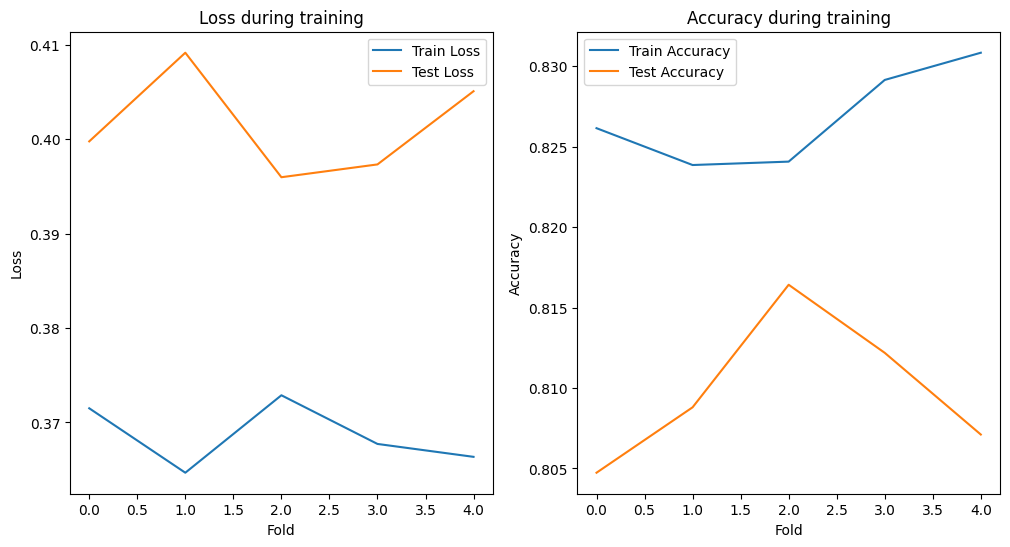

In [22]:
# Извлечение данных для графика
train_loss = -cv_results['train_neg_log_loss']
test_loss = -cv_results['test_neg_log_loss']
train_accuracy = cv_results['train_accuracy']
test_accuracy = cv_results['test_accuracy']

# Построение графика потерь
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.legend()

# Построение графика точности
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy during training')
plt.legend()

plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
# Выполнение кросс-валидации и получение предсказаний для тренировочного набора данных
y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=5)

In [ ]:
import joblib
# Загрузка модели
best_model = joblib.load('trained_model_0,80640.pkl')

In [ ]:
# Обучение модели на всем тренировочном наборе данных
best_model.fit(X_train, y_train)

0:	learn: 0.6876726	total: 7.19ms	remaining: 7.19s
250:	learn: 0.3876265	total: 1.46s	remaining: 4.35s
500:	learn: 0.3435546	total: 2.89s	remaining: 2.88s
750:	learn: 0.3175009	total: 4.35s	remaining: 1.44s
999:	learn: 0.2942655	total: 5.77s	remaining: 0us


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'Cabin_2', 'VRDeck',
                                                   'CryoSleep', 'VIP']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['HomePlanet', 'Destination',
                                                   'Cabin_1', 'Cabin_3'])])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x00000270A8271600>)])

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
# Оценка модели на тестовом наборе данных
#y_pred = pipeline.predict(X_test)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy = {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 = {f1:.4f}')

Accuracy = 0.8052
Precision: 0.8001
Recall: 0.8173
F1 = 0.8086


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# Отчет о классификации
print(classification_report(y_test, y_pred))
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

       False       0.81      0.79      0.80      1381
        True       0.80      0.82      0.81      1401

    accuracy                           0.81      2782
   macro avg       0.81      0.81      0.81      2782
weighted avg       0.81      0.81      0.81      2782

[[1095  286]
 [ 256 1145]]


              precision    recall  f1-score   support

       False       0.83      0.80      0.82      1381
        True       0.81      0.84      0.83      1401

    accuracy                           0.82      2782
   macro avg       0.82      0.82      0.82      2782
weighted avg       0.82      0.82      0.82      2782

[[1111  270]
 [ 221 1180]]


 Accuracy = 0.8235
Precision: 0.8138
Recall: 0.8423
F1 = 0.8278



скор Кэггл 0,80640

Эта таблица представляет собой отчет о классификации, который предоставляет различные метрики оценки качества модели классификации. Давайте разберем, что означают различные части этой таблицы:

### 1. **Классы (`False` и `True`)**

- **False**: Это один из классов, который модель пытается предсказать. В данном случае, `False` может означать отрицательный класс (например, "не заболел").
- **True**: Это другой класс, который модель пытается предсказать. В данном случае, `True` может означать положительный класс (например, "заболел").

### 2. **Метрики для каждого класса**

- **Precision (Точность)**: Доля правильных положительных предсказаний среди всех положительных предсказаний. Вычисляется как отношение истинно положительных (TP) к сумме истинно положительных и ложноположительных (FP):
  \[
  \text{Precision} = \frac{TP}{TP + FP}
  \]
  - Для класса `False`: 0.82 (82% положительных предсказаний для класса `False` были правильными).
  - Для класса `True`: 0.79 (79% положительных предсказаний для класса `True` были правильными).

- **Recall (Полнота)**: Доля правильных положительных предсказаний среди всех фактических положительных случаев. Вычисляется как отношение истинно положительных (TP) к сумме истинно положительных и ложноотрицательных (FN):
  \[
  \text{Recall} = \frac{TP}{TP + FN}
  \]
  - Для класса `False`: 0.78 (78% фактических случаев класса `False` были правильно предсказаны).
  - Для класса `True`: 0.83 (83% фактических случаев класса `True` были правильно предсказаны).

- **F1-score (F1-мера)**: Гармоническое среднее между точностью и полнотой. Она дает одно число, которое объединяет точность и полноту:
  \[
  \text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  \]
  - Для класса `False`: 0.80 (среднее гармоническое между точностью 0.82 и полнотой 0.78).
  - Для класса `True`: 0.81 (среднее гармоническое между точностью 0.79 и полнотой 0.83).

- **Support (Количество примеров)**: Количество фактических примеров каждого класса в тестовом наборе данных.
  - Для класса `False`: 1381 примеров.
  - Для класса `True`: 1401 примеров.

### 3. **Общая точность (accuracy)**

- **Accuracy (Точность)**: Доля правильных предсказаний среди всех предсказаний. Вычисляется как отношение общего количества правильных предсказаний к общему количеству примеров:
  \[
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  \]
  - Общая точность модели: 0.81 (81% всех предсказаний были правильными).

### 4. **Средние значения (macro avg и weighted avg)**

- **Macro avg (Макросреднее)**: Простое среднее значение метрик для каждого класса. Оно не учитывает дисбаланс классов.
  - Точность: 0.81 (среднее значение точности для классов `False` и `True`).
  - Полнота: 0.80 (среднее значение полноты для классов `False` и `True`).
  - F1-score: 0.80 (среднее значение F1-меры для классов `False` и `True`).

- **Weighted avg (Взвешенное среднее)**: Среднее значение метрик для каждого класса, взвешенное по количеству примеров в каждом классе. Оно учитывает дисбаланс классов.
  - Точность: 0.81 (взвешенное среднее значение точности для классов `False` и `True`).
  - Полнота: 0.81 (взвешенное среднее значение полноты для классов `False` и `True`).
  - F1-score: 0.81 (взвешенное среднее значение F1-меры для классов `False` и `True`).

### Заключение

Эта таблица предоставляет подробную информацию о качестве модели классификации для каждого класса, а также общую точность модели. Она помогает понять, насколько хорошо модель справляется с предсказанием каждого класса и как эти предсказания влияют на общую точность модели.

In [ ]:
# Сохранение модели
joblib.dump(pipeline, 'trained_model.pkl')

Accuracy = 0.7952
Precision: 0.7849
Recall: 0.8172
F1 = 0.8007

In [34]:
data_test[num_cols] = data_test[num_cols].astype(float)
data_test[num_cols] =IterativeImputer(initial_strategy= 'most_frequent', n_nearest_features = 40, random_state=0, max_iter = 10).fit_transform(data_test[num_cols])
data_test[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(data_test[cat_cols])

In [111]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   float64
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   float64
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
 11  Cabin_1       4277 non-null   object 
 12  Cabin_2       4277 non-null   float64
 13  Cabin_3       4277 non-null   object 
 14  Name_1        4277 non-null   object 
 15  Name_2        4277 non-null   object 
dtypes: float64(9), object(7)
memory usage: 534.8+ KB


In [35]:
predictions = loaded_model.predict(data_test.drop('PassengerId', axis=1, inplace=False))
submission_ids = data_test['PassengerId']
predictions = pd.Series(predictions).astype(bool)
predictions = pd.DataFrame({'Transported': predictions.astype(bool)})
sample_submission = pd.concat([submission_ids, predictions],axis=1)
sample_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [36]:
# Запись DataFrame в файл CSV
sample_submission.to_csv('sample_submission.csv', index=False)